<a href="https://colab.research.google.com/github/obedest/DeepLearning-with-PyTorch---Codemy.com/blob/main/Basic_NNM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F # will help move data forward in our fuction

In [ ]:
# create a Model Class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -> hidden layer 1 (with some number of neurons) -> hidden layer 2 -> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3): # 8 and 9 are random numbers
    super().__init__() # instantiale our nn.Module
    self.fc1 = nn.Linear(in_features, h1) # fc stands for fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
    # nn.Linear is used to create a "fully connected" or "dense" layer in a neural network. This type of layer performs a linear transformation on the input data: output = input * weights + bias.
    # What it does: It takes an input tensor and applies a learned set of weights and biases to produce an output tensor. The in_features argument specifies the number of input features (the size of the input tensor), and the out_features argument specifies the number of output features (the size of the output tensor).
    # Other options: PyTorch's nn module offers many other types of layers depending on the task:
    # nn.Conv2d: For convolutional layers (commonly used in image processing).
    # nn.LSTM or nn.GRU: For recurrent layers (commonly used for sequential data like text).
    # nn.BatchNorm1d, nn.BatchNorm2d: For batch normalization layers (help stabilize training).
    # nn.Dropout: For dropout layers (a regularization technique to prevent overfitting).
    # And many more!

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    # F.relu is the Rectified Linear Unit activation function. It's a very common choice for the hidden layers of neural networks.
    # What it does: The ReLU function is simple: f(x) = max(0, x). It introduces non-linearity into the model. Without non-linear activation functions between layers, a neural network, no matter how many layers it has, would only be able to learn linear relationships between the input and output, which is insufficient for most complex tasks. ReLU is computationally efficient and helps with mitigating the vanishing gradient problem in deep networks.
    # Other options: There are many other activation functions you could use:
    # F.sigmoid: Squashes the output to a range between 0 and 1 (often used in the output layer for binary classification).
    # F.softmax: Often used in the output layer for multi-class classification to produce a probability distribution over the classes.

    return x

In [ ]:
# pick a manual seed for randomization (to get closer results to the orig course video)
torch.manual_seed(41)
# create an instance of model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
# You import pyplot to gain access to its functions for creating plots, such as plt.plot(), plt.xlabel(), plt.ylabel(), plt.title(), etc. The convention is to import it as plt for brevity.
%matplotlib inline
# %matplotlib inline command is used to tell the environment to display the plots generated by matplotlib directly within the notebook cells, rather than opening them in a separate window. This makes it easy to visualize your data and results directly alongside your code.

In [ ]:
import pandas as pd
# to read_csv in my case
# Besides CSV, pandas can read data from various other formats, including:
# Excel files (pd.read_excel())
# SQL databases (pd.read_sql())
# JSON files (pd.read_json())
# HTML tables (pd.read_html())
# And more.

# Pandas introduces two primary data structures:
# Series: A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
# DataFrame: A two-dimensional labeled data structure with columns of potentially different types. This is the most commonly used pandas object, similar to a spreadsheet or a SQL table. Your my_data_frame is a DataFrame.

# Data Manipulation:
# Grouping data (groupby()).
# Aggregating data (e.g., sum(), mean(), count()).
# Merging and joining DataFrames.
# Reshaping data (pivot_table(), melt()).
# Data Analysis and Exploration:
# Calculating descriptive statistics (describe()).
# Calculating correlations (corr()).
# Creating frequency tables (value_counts()).
# Applying functions to data (apply()).

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_data_frame = pd.read_csv(url)

In [ ]:
# my_data_frame.head() # get the first 5 rows
# my_data_frame.tail() # the last 5

# Both .head() and .tail() are indeed methods that come from the pandas library. They are methods of pandas DataFrame and Series objects.

# .head(): This method returns the first n rows of a DataFrame or Series. By default, it returns the first 5 rows, but you can specify a different number by passing an integer argument (e.g., my_data_frame.head(10) would return the first 10 rows).
# .tail(): This method returns the last n rows of a DataFrame or Series. Similar to .head(), it returns the last 5 rows by default, and you can specify a different number.

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# change last column from string to integer
my_data_frame['species'] = my_data_frame['species'].replace('setosa', 0.0)
my_data_frame['species'] = my_data_frame['species'].replace('versicolor', 1.0)
my_data_frame['species'] = my_data_frame['species'].replace('virginica', 2.0)
my_data_frame

# The .replace() method is also a method from the pandas library. It's a very useful method for replacing values in a DataFrame or Series.
# The .replace() method is quite versatile and can be used to replace:
# A single value with another single value.
# A list of values with a single value.
# A list of values with another list of values.
# Using regular expressions for more complex pattern replacement.

/tmp/ipython-input-578740506.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_data_frame['species'] = my_data_frame['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# train test split! set x, y
X = my_data_frame.drop('species', axis = 1) # need to set axis to 1 because that's a column
# axis = 1: This is crucial. In pandas, operations can be applied along rows (axis = 0) or columns (axis = 1). Setting axis = 1 tells pandas to drop a column (as opposed to dropping a row if you used axis = 0).
y = my_data_frame['species']

In [ ]:
# convert these to numpy arrays
X = X.values
y = y.values
# The .values attribute is a property of pandas DataFrames and Series. When you access .values, pandas returns the data as a NumPy array.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # random state part is not necessary, just to keep it similar to orig video

In [ ]:
# float because x-things are all decimals
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# These lines convert your NumPy arrays X_train and X_test into PyTorch tensors of type FloatTensor.

# convert y labels to tensors long
# long tensors are 64 bit integers (because we want the species thing to be int)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
# torch.LongTensor is used for tensors containing 64-bit integer numbers. In your case, your labels (y)
# represent discrete classes (0, 1, 2) after you replaced the string species names with integers. When
# working with classification tasks and loss functions like nn.CrossEntropyLoss (which you use later),
# the target labels are typically expected to be integer types, specifically LongTensor.

# PyTorch supports various tensor types to accommodate different kinds of data and computational needs. Here are some common ones besides FloatTensor and LongTensor:
# torch.BoolTensor: Tensors containing boolean values (True or False). Useful for masking and logical operations.
# torch.DoubleTensor: Tensors containing 64-bit floating-point numbers (also known as torch.float64). Offers higher precision than FloatTensor but uses more memory and can be slower.

In [ ]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss() #function we use for this model
# The criterion, or loss function, is a mathematical function that measures the difference between the model's predictions and the actual target values. It quantifies how "wrong" your model's predictions are.
# nn.CrossEntropyLoss(): This is the specific loss function you are using. It's a very common choice for multi-class classification problems like the Iris dataset (where you are classifying flowers into one of three species). It combines two steps:
# It calculates the softmax activation on the model's output (converting the raw output scores into probabilities that sum up to 1 across the classes).
# It then calculates the negative log-likelihood of the true class given the predicted probabilities. This penalizes the model more heavily when it assigns a low probability to the correct class.

# The choice of loss function depends heavily on the type of problem you are trying to solve:
# nn.MSELoss() (Mean Squared Error Loss): Commonly used for regression problems, where the goal is to predict a continuous numerical value. It calculates the average of the squared differences between the predicted and actual values.
# nn.BCELoss() (Binary Cross Entropy Loss): Used for binary classification problems (two classes). It measures the difference between two probability distributions. Often used with a sigmoid activation in the output layer.
# nn.BCEWithLogitsLoss(): Similar to BCELoss but is more numerically stable and should be used when the model's output is raw scores (logits) without a sigmoid activation.
# nn.L1Loss() (Mean Absolute Error Loss): Another option for regression, calculating the average of the absolute differences between predictions and actuals. Less sensitive to outliers than MSELoss.
# Custom Loss Functions: You can also define your own custom loss function if none of the standard ones fit your specific problem requirements.

#choose optimizer (adam optimizer) and set our learning rate = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) #lr - learning rate
# the lower the learning rate, the more time the model will take to learn

# The optimizer is an algorithm that adjusts the model's parameters (weights and biases) during training in order to minimize the loss function. It determines how the model learns from the error signal provided by the loss function.
# torch.optim.Adam: This specifies that you are using the Adam optimizer. Adam is a popular and generally effective optimization algorithm that adapts the learning rate for each parameter individually based on estimates of first and second moments of the gradients.
# model.parameters(): This tells the optimizer which parameters it should update. model.parameters() is a method that returns an iterator over all the learnable parameters (weights and biases) in your Model instance.
# lr = 0.01: This sets the learning rate. The learning rate is a hyperparameter that controls how large of a step the optimizer takes in the direction of the negative gradient during each update. A higher learning rate means larger steps, which can lead to faster
# convergence but might overshoot the minimum. A lower learning rate means smaller steps, which can be slower but might help the optimizer find a better minimum. Choosing an appropriate learning rate is crucial for effective training.

# There are many other optimization algorithms available in torch.optim:
# torch.optim.SGD() (Stochastic Gradient Descent): A fundamental optimizer. It updates parameters based on the gradient of the loss for a small batch of data. Can be slow but is well-understood. Often used with momentum.
# torch.optim.Adagrad(): Adapts the learning rate to the parameters, but the learning rate tends to decrease over time.
# torch.optim.RMSprop(): Similar to Adagrad but with a different way of scaling the learning rate.

In [ ]:
# train our model
# define how many epochs we want (epoch - run thru all the training data in our network)
epochs = 100
# we want to track our error
losses = []

for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error, will be high in the beginning
  loss = criterion(y_pred, y_train) # predicted value Vs y_train value

  # keep track of our losses
  losses.append(loss.detach().numpy()) # we do that because loss is a tensor and we want to convert it
  # This line is used to record the value of the loss at the end of each training epoch. Let's break it down step by step:
  # loss: This is the loss variable you calculated using criterion(y_pred, y_train). In PyTorch, when you calculate a loss using a criterion on tensors that require gradients, the resulting loss variable is also a PyTorch tensor that is part of the computation graph. This means PyTorch is keeping track of how this loss was computed from the model's parameters, which is necessary for backpropagation.
  # .detach(): This is a method called on a PyTorch tensor. When you call .detach() on a tensor that is part of a computation graph, it creates a new tensor that has the same data but is detached from the graph. This means that no gradients will be calculated for this new tensor during the backward pass.
  # Why detach?: You want to store the loss value for plotting or analysis, but you don't want the process of appending the loss to the losses list to be part of the gradient calculation during backpropagation. Detaching the tensor prevents gradients from flowing back through this operation.
  # .numpy(): This is a method called on a PyTorch tensor (after it has been detached). It converts the PyTorch tensor into a NumPy array.
  # Why numpy?: The losses list is a standard Python list, and you want to append a simple numerical value to it, not a PyTorch tensor (especially one that is part of a computation graph). Converting the detached tensor to a NumPy array gives you a standard numerical value that can be easily stored in a Python list and used later for plotting with Matplotlib (which works well with NumPy arrays).

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i}, loss: {loss}')

  # do some back propogation: take the error rate of forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # optimizer.zero_grad(): This line clears the gradients of all optimized tensors. Gradients are calculated during the backward pass (loss.backward()) and accumulate by default. Before calculating the gradients for the current epoch, you need to zero them out to prevent them from mixing with the gradients from previous epochs.
  # loss.backward(): This is the backpropagation step. It calculates the gradient of the loss with respect to each parameter in your model (model.parameters()). These gradients indicate how much each parameter needs to change to reduce the loss.
  # optimizer.step(): This line updates the model's parameters using the gradients computed in the backward pass and the chosen optimization algorithm (Adam in your case). The optimizer adjusts the weights and biases of the network based on the learning rate and the calculated gradients, moving the model towards a state that minimizes the loss.
  # In essence, this block of code does the following in each epoch:
  # Clears old gradients.
  # Calculates new gradients based on the current loss.
  # Updates the model's parameters using the calculated gradients to improve its performance.

Epoch: 0, loss: 1.1251550912857056
Epoch: 10, loss: 1.0096259117126465
Epoch: 20, loss: 0.8512223958969116
Epoch: 30, loss: 0.654869019985199
Epoch: 40, loss: 0.4490566551685333
Epoch: 50, loss: 0.2707386612892151
Epoch: 60, loss: 0.15461841225624084
Epoch: 70, loss: 0.09299226105213165
Epoch: 80, loss: 0.06447025388479233
Epoch: 90, loss: 0.050585027784109116


Text(0.5, 0, 'epoch')

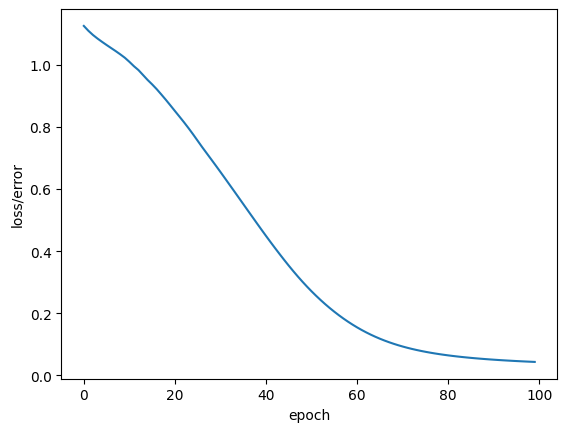

In [ ]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')